Số lượng giá trị thiếu ban đầu:
 Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64
Sentiment
1    17448
0     2370
Name: count, dtype: int64
Phân bố dữ liệu sau khi đánh nhãn:
 Sentiment
1    17448
0     2370
Name: count, dtype: int64


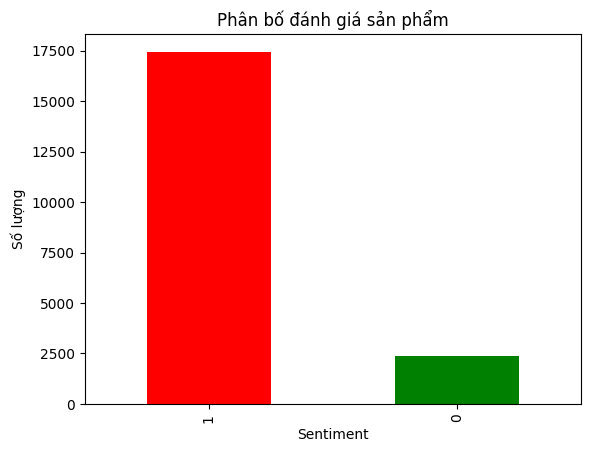

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5678).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.9170030272452069
              precision    recall  f1-score   support

           0       0.63      0.76      0.69       478
           1       0.97      0.94      0.95      3486

    accuracy                           0.92      3964
   macro avg       0.80      0.85      0.82      3964
weighted avg       0.93      0.92      0.92      3964



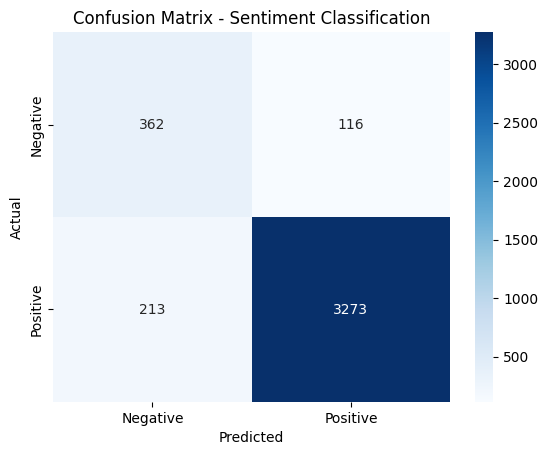

Review: This dress is fantastic! I love it! -> Sentiment: Positive
Review: The fabric is terrible and it ripped easily. -> Sentiment: Negative
Review: I am very satisfied with this purchase, great quality! -> Sentiment: Positive
Review: Poorly made, not worth the money. -> Sentiment: Negative
Review: Absolutely love this! Fits perfectly. -> Sentiment: Positive
Review: Not happy at all, bad experience. -> Sentiment: Negative
Review: Wonderful fabric and excellent design! -> Sentiment: Positive
Review: Size was incorrect and material feels cheap. -> Sentiment: Negative


In [2]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Tải dữ liệu
file_path = "Womens Clothing E-Commerce Reviews.csv"
df = pd.read_csv(file_path)

# Loại bỏ dữ liệu thiếu
print("Số lượng giá trị thiếu ban đầu:\n", df.isnull().sum())
df = df.dropna(subset=['Review Text', 'Rating'])

# Đánh nhãn dữ liệu
# Phân loại đánh giá: 1 (tích cực) nếu Rating >= 4, 0 (tiêu cực) nếu Rating <= 2
# Bỏ qua đánh giá trung lập (Rating = 3)
df = df[df['Rating'] != 3]
df['Sentiment'] = df['Rating'].apply(lambda x: 1 if x > 3 else 0)
print(df['Sentiment'].value_counts())

# Thống kê dữ liệu mẫu
print("Phân bố dữ liệu sau khi đánh nhãn:\n", df['Sentiment'].value_counts())

# Vẽ đồ thị thể hiện sự phân bố
df['Sentiment'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.xlabel("Sentiment")
plt.ylabel("Số lượng")
plt.title("Phân bố đánh giá sản phẩm")
plt.show()

# Tiền xử lý văn bản
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df['Cleaned Review'] = df['Review Text'].apply(clean_text)

# Biểu diễn văn bản bằng TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Cleaned Review'])
y = df['Sentiment'].values


# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# SMOTE tạo thêm mẫu lớp thiểu số
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train SVM với dữ liệu đã cân bằng
model = SVC(kernel='linear', max_iter=5678, class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)

# Dự đoán và đánh giá
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Sentiment Classification")
plt.show()



# Kiểm thử với dữ liệu mới
new_reviews = [
    "This dress is fantastic! I love it!",
    "The fabric is terrible and it ripped easily.",
    "I am very satisfied with this purchase, great quality!",
    "Poorly made, not worth the money.",
    "Absolutely love this! Fits perfectly.",
    "Not happy at all, bad experience.",
    "Wonderful fabric and excellent design!",
    "Size was incorrect and material feels cheap."
]
new_reviews_cleaned = [clean_text(text) for text in new_reviews]
new_reviews_vectorized = vectorizer.transform(new_reviews_cleaned)
predictions = model.predict(new_reviews_vectorized)
for review, pred in zip(new_reviews, predictions):
    sentiment = "Positive" if pred == 1 else "Negative"
    print(f"Review: {review} -> Sentiment: {sentiment}")